In [1]:
import torch
import numpy as np
import random
import torch.nn as nn
import torch.nn.functional as F
import itertools
import pdb
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

import sys

sys.path.insert(0, './src')

from data import Dataset
from kernels import HMC_our, HMC_vanilla, Reverse_kernel
from models import Gen_network, Inf_network
from target import NN_bernoulli
from utils import plot_digit_samples, get_samples
from args import get_args

In [2]:
torchType = torch.float32

In [3]:
def set_seeds(rand_seed):
#     torch.cuda.manual_seed_all(rand_seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    torch.manual_seed(rand_seed)
    np.random.seed(rand_seed)
    random.seed(rand_seed)

seed = 1 # 1337 #
set_seeds(seed)

In [4]:
args = get_args()

In [5]:
encoder = Inf_network(kwargs=args).to(args.device)
target = NN_bernoulli(kwargs=args, model=Gen_network(args.z_dim, args), device=args.device).to(args.device)

if args.learnable_reverse:
    reverse_kernel = Reverse_kernel(kwargs=args).to(args.device)
    reverse_params = reverse_kernel.parameters()
else:
    reverse_params = list([])

if args.amortize:
    transitions = HMC_our(kwargs=args).to(args.device)
else:
    transitions = nn.ModuleList([HMC_our(kwargs=args).to(args.device) for _ in range(args['K'])])
    
for p in transitions.parameters():
    p.requires_grad_(False)

params = [encoder.parameters(), target.parameters(), transitions.parameters(), reverse_params]
optimizer = torch.optim.Adam(params=itertools.chain(*params), lr=1e-4)

In [6]:
dataset = Dataset(args, device=args.device)

In [7]:
random_code = args.std_normal.sample((64, args.z_dim))

  0%|          | 0/500 [00:00<?, ?it/s]

On batch number 1/100 and on k = 1 we have for  0: 0.5320000252686441 and for +1: 0.4680000222288072
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.4600000218488276 and for +1: 0.5400000256486237
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 1 	 Current ELBO: -525.239013671875
Saved samples to ./pics/mnist_epoch_0_K_2_N_2_amortize_True.png


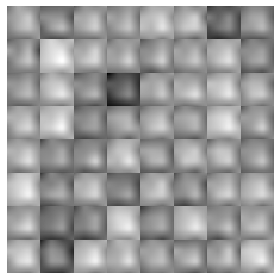

  0%|          | 1/500 [00:22<3:08:35, 22.68s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.48600002308376133 and for +1: 0.51400002441369
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.49200002336874604 and for +1: 0.5080000241287053
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 2 	 Current ELBO: -343.16571044921875
Saved samples to ./pics/mnist_epoch_1_K_2_N_2_amortize_True.png


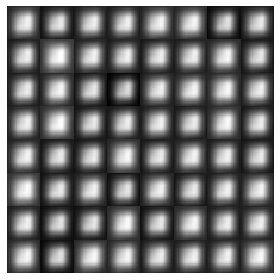

  0%|          | 2/500 [00:45<3:08:16, 22.68s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.48800002317875624 and for +1: 0.5120000243186951
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.48200002289377153 and for +1: 0.5180000246036798
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 3 	 Current ELBO: -326.70068359375
Saved samples to ./pics/mnist_epoch_2_K_2_N_2_amortize_True.png


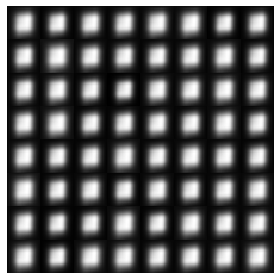

  1%|          | 3/500 [01:08<3:07:55, 22.69s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.48600002308376133 and for +1: 0.51400002441369
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.4800000227987766 and for +1: 0.5200000246986747
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 4 	 Current ELBO: -308.78619384765625
Saved samples to ./pics/mnist_epoch_3_K_2_N_2_amortize_True.png


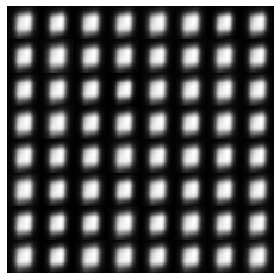

  1%|          | 4/500 [01:30<3:07:46, 22.72s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5180000246036798 and for +1: 0.48200002289377153
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5240000248886645 and for +1: 0.4760000226087868
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 5 	 Current ELBO: -295.3011169433594
Saved samples to ./pics/mnist_epoch_4_K_2_N_2_amortize_True.png


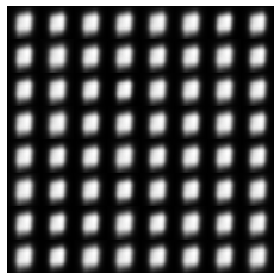

  1%|          | 5/500 [01:53<3:07:36, 22.74s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5260000249836594 and for +1: 0.4740000225137919
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5000000237487257 and for +1: 0.5000000237487257
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 6 	 Current ELBO: -311.00982666015625
Saved samples to ./pics/mnist_epoch_5_K_2_N_2_amortize_True.png


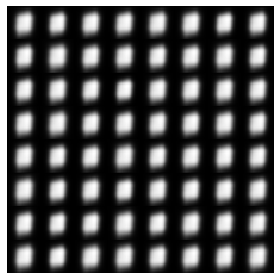

  1%|          | 6/500 [02:16<3:07:19, 22.75s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.48200002289377153 and for +1: 0.5180000246036798
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5560000264085829 and for +1: 0.4440000210888684
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 7 	 Current ELBO: -292.99017333984375
Saved samples to ./pics/mnist_epoch_6_K_2_N_2_amortize_True.png


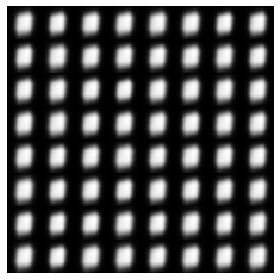

  1%|▏         | 7/500 [02:39<3:07:00, 22.76s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.49800002365373075 and for +1: 0.5020000238437206
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.472000022418797 and for +1: 0.5280000250786543
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 8 	 Current ELBO: -303.8936462402344
Saved samples to ./pics/mnist_epoch_7_K_2_N_2_amortize_True.png


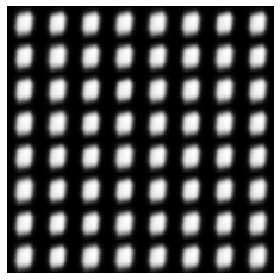

  2%|▏         | 8/500 [03:01<3:06:40, 22.77s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5060000240337104 and for +1: 0.49400002346374094
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5080000241287053 and for +1: 0.49200002336874604
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 9 	 Current ELBO: -311.0293273925781
Saved samples to ./pics/mnist_epoch_8_K_2_N_2_amortize_True.png


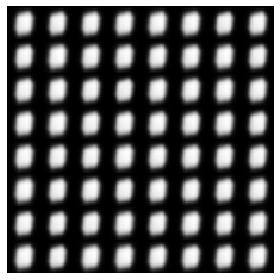

  2%|▏         | 9/500 [03:24<3:06:20, 22.77s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.49600002355873585 and for +1: 0.5040000239387155
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5520000262185931 and for +1: 0.4480000212788582
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 10 	 Current ELBO: -300.021484375
Saved samples to ./pics/mnist_epoch_9_K_2_N_2_amortize_True.png


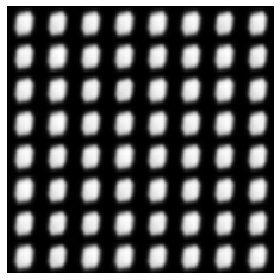

  2%|▏         | 10/500 [03:47<3:05:58, 22.77s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.4760000226087868 and for +1: 0.5240000248886645
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5100000242237002 and for +1: 0.49000002327375114
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 11 	 Current ELBO: -306.9419250488281
Saved samples to ./pics/mnist_epoch_10_K_2_N_2_amortize_True.png


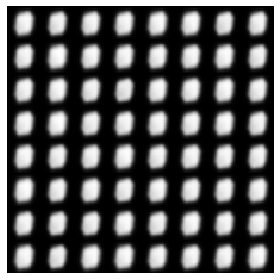

  2%|▏         | 11/500 [04:10<3:05:40, 22.78s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.51400002441369 and for +1: 0.48600002308376133
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.49200002336874604 and for +1: 0.5080000241287053
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 12 	 Current ELBO: -297.2864990234375
Saved samples to ./pics/mnist_epoch_11_K_2_N_2_amortize_True.png


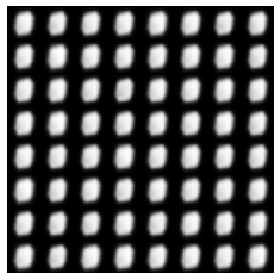

  2%|▏         | 12/500 [04:33<3:05:19, 22.79s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.4580000217538327 and for +1: 0.5420000257436186
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.4800000227987766 and for +1: 0.5200000246986747
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 13 	 Current ELBO: -300.8165283203125
Saved samples to ./pics/mnist_epoch_12_K_2_N_2_amortize_True.png


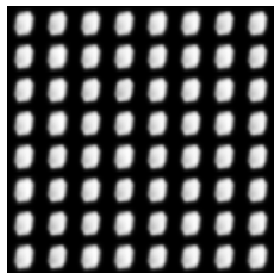

  3%|▎         | 13/500 [04:55<3:04:56, 22.78s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5240000248886645 and for +1: 0.4760000226087868
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5100000242237002 and for +1: 0.49000002327375114
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 14 	 Current ELBO: -298.16363525390625
Saved samples to ./pics/mnist_epoch_13_K_2_N_2_amortize_True.png


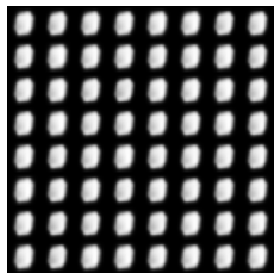

  3%|▎         | 14/500 [05:18<3:04:32, 22.78s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.49200002336874604 and for +1: 0.5080000241287053
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5360000254586339 and for +1: 0.4640000220388174
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 15 	 Current ELBO: -295.7216796875
Saved samples to ./pics/mnist_epoch_14_K_2_N_2_amortize_True.png


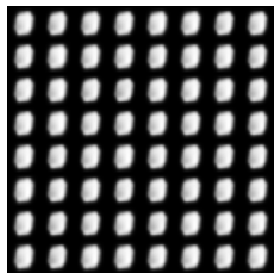

  3%|▎         | 15/500 [05:41<3:04:09, 22.78s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.48600002308376133 and for +1: 0.51400002441369
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.472000022418797 and for +1: 0.5280000250786543
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 16 	 Current ELBO: -291.1156311035156
Saved samples to ./pics/mnist_epoch_15_K_2_N_2_amortize_True.png


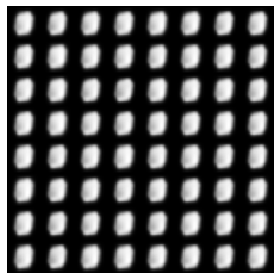

  3%|▎         | 16/500 [06:04<3:03:45, 22.78s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5000000237487257 and for +1: 0.5000000237487257
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.49600002355873585 and for +1: 0.5040000239387155
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 17 	 Current ELBO: -306.44586181640625
Saved samples to ./pics/mnist_epoch_16_K_2_N_2_amortize_True.png


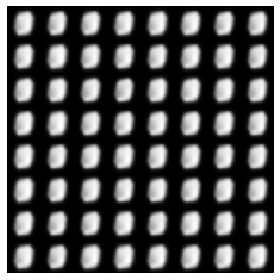

  3%|▎         | 17/500 [06:27<3:03:22, 22.78s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.49600002355873585 and for +1: 0.5040000239387155
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5200000246986747 and for +1: 0.4800000227987766
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 18 	 Current ELBO: -290.91583251953125
Saved samples to ./pics/mnist_epoch_17_K_2_N_2_amortize_True.png


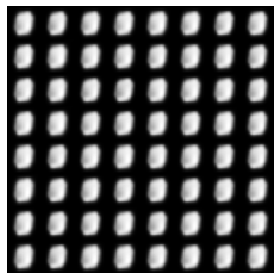

  4%|▎         | 18/500 [06:50<3:03:27, 22.84s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.4660000221338123 and for +1: 0.534000025363639
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.48600002308376133 and for +1: 0.51400002441369
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 19 	 Current ELBO: -299.7822570800781
Saved samples to ./pics/mnist_epoch_18_K_2_N_2_amortize_True.png


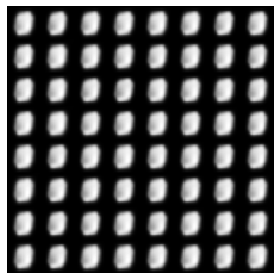

  4%|▍         | 19/500 [07:13<3:03:43, 22.92s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.48800002317875624 and for +1: 0.5120000243186951
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.4600000218488276 and for +1: 0.5400000256486237
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 20 	 Current ELBO: -298.19378662109375
Saved samples to ./pics/mnist_epoch_19_K_2_N_2_amortize_True.png


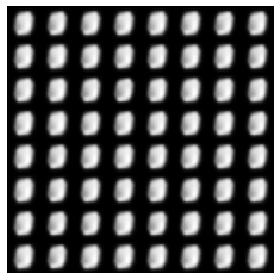

  4%|▍         | 20/500 [07:36<3:03:43, 22.97s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.4700000223238021 and for +1: 0.5300000251736492
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5160000245086849 and for +1: 0.48400002298876643
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 21 	 Current ELBO: -288.2586975097656
Saved samples to ./pics/mnist_epoch_20_K_2_N_2_amortize_True.png


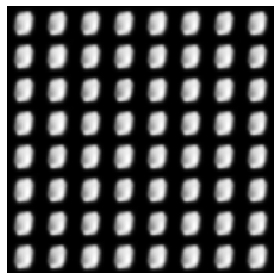

  4%|▍         | 21/500 [07:59<3:03:29, 22.98s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.5000000237487257 and for +1: 0.5000000237487257
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.49800002365373075 and for +1: 0.5020000238437206
Stepsize 0.019999998759075654
Autoregression coeff 0.5
Current epoch: 22 	 Current ELBO: -291.0315856933594
Saved samples to ./pics/mnist_epoch_21_K_2_N_2_amortize_True.png


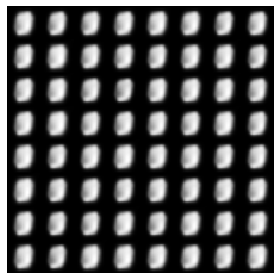

  4%|▍         | 22/500 [08:22<3:03:08, 22.99s/it]

On batch number 1/100 and on k = 1 we have for  0: 0.4740000225137919 and for +1: 0.5260000249836594
Stepsize 0.019999998759075654
Autoregression coeff 0.5
On batch number 1/100 and on k = 2 we have for  0: 0.5200000246986747 and for +1: 0.4800000227987766
Stepsize 0.019999998759075654
Autoregression coeff 0.5


KeyboardInterrupt: 

In [8]:
print_info_ = 1

torch_log_2 = torch.tensor(np.log(2.), device=args.device, dtype=args.torchType)


def compute_loss(z_new, p_new, u, p_old, x, sum_log_alpha, sum_log_jac, sum_log_sigma, mu=None, all_directions=None):
    log_p = target.get_logdensity(z=z_new, x=x) + args.std_normal.log_prob(p_new).sum(1)
    if args.learnable_reverse:
        log_r = reverse_kernel(z_fin=z_new, mu=mu.detach(), a=all_directions)
        log_m = args.std_normal.log_prob(u).sum(1) + args.std_normal.log_prob(p_old).sum(1) - sum_log_jac - sum_log_sigma + sum_log_alpha
    else:
        log_r = 0 #-args.K * torch_log_2
        log_m = args.std_normal.log_prob(u).sum(1) + args.std_normal.log_prob(p_old).sum(1) - sum_log_jac - sum_log_sigma # + sum_log_alpha
    
    elbo_full = log_p + log_r - log_m
    grad_elbo = torch.mean(elbo_full + elbo_full.detach() * sum_log_alpha)
    return elbo_full, grad_elbo
  
# with torch.autograd.detect_anomaly():
for ep in tqdm(range(args.num_epoches)): # cycle over epoches
    for b_num, batch_train in enumerate(dataset.next_train_batch()): # cycle over batches

        cond_vectors = [args.std_normal.sample((args.z_dim, )) for _ in range(args.K)]
        optimizer.zero_grad()

        mu, sigma = encoder(batch_train) # sample mu and sigma from encoder
        u = args.std_normal.sample(mu.shape) # sample random tensor for reparametrization trick
        z = mu + sigma * u # reperametrization trick
        p_old = args.std_normal.sample(mu.shape)

        sum_log_alpha = torch.zeros(mu.shape[0], dtype=args.torchType, device=args.device) # for grad log alpha accumulation
        sum_log_jacobian = torch.zeros(mu.shape[0], dtype=args.torchType, device=args.device) # for log_jacobian accumulation
        sum_log_sigma = torch.sum(torch.log(sigma), 1)
        p = p_old
        if args.learnable_reverse:
            all_directions = torch.tensor([], device=args.device)
        else:
            all_directions = None
        for k in range(args.K):
            # sample alpha - transition probabilities 
            if args.amortize:
                z, p, log_jac, current_log_alphas, directions, _ = transitions.make_transition(q_old=z, x=batch_train,
                                                    p_old=p, k=cond_vectors[k], target_distr=target)
            else:
                z, p, log_jac, current_log_alphas, directions, _ = transitions[k].make_transition(q_old=z, x=batch_train,
                                                                    p_old=p, k=cond_vectors[k], target_distr=target) # sample a_i -- directions

            if ep  % print_info_ == 0 and b_num % (100 * print_info_) == 0:
                print('On batch number {}/{} and on k = {} we have for  0: {} and for +1: {}'.format(b_num + 1,
                                                                        dataset.train.shape[0] // args['train_batch_size'],
                                                                           k + 1,
                                                    (directions==0.).to(float).mean(),
                                                                    (directions==1.).to(float).mean()))
                if args.amortize:
                    print('Stepsize {}'.format(np.exp(transitions.gamma.cpu().detach().item())))
                    print('Autoregression coeff {}'.format(torch.sigmoid(transitions.alpha_logit).cpu().detach().item()))
            if args.learnable_reverse:
                all_directions = torch.cat([all_directions, directions.view(-1, 1)], dim=1)
            # Accumulate alphas
            sum_log_alpha = sum_log_alpha + current_log_alphas
            sum_log_jacobian = sum_log_jacobian + log_jac  # refresh log jacobian

        elbo_full, grad_elbo = compute_loss(z_new=z, p_new=p, u=u, p_old=p_old, x=batch_train, sum_log_alpha=sum_log_alpha,
                                            sum_log_jac=sum_log_jacobian, sum_log_sigma=sum_log_sigma, mu=mu, all_directions=all_directions)
    #     pdb.set_trace()
        (-grad_elbo).backward()
        if args.clip_norm:
            torch.nn.utils.clip_grad_norm_(itertools.chain(*params), args.clip_value)
        optimizer.step()
        optimizer.zero_grad()
        # Bias squared
    if ep % print_info_ == 0:
        print('Current epoch:', (ep + 1), '\t', 'Current ELBO:', elbo_full.detach().mean().item())
        plot_digit_samples(samples=get_samples(target.decoder, random_code), args=args, epoch=ep)

In [ ]:
print('a')

In [ ]:
elbo_full.mean()

In [ ]:
print(args.learnable_reverse)